In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("C:/Users/admin/Intern/Seaborn/stock_data.csv", index_col='Date', parse_dates=True)
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,NaN,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,NaN,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,NaN,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,NaN,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,NaN,43.10,43.66,42.82,43.42,16268338,AABA


In [11]:
df.drop(columns='Unnamed: 0', inplace=True)

In [12]:
df

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA
...,...,...,...,...,...,...
2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA


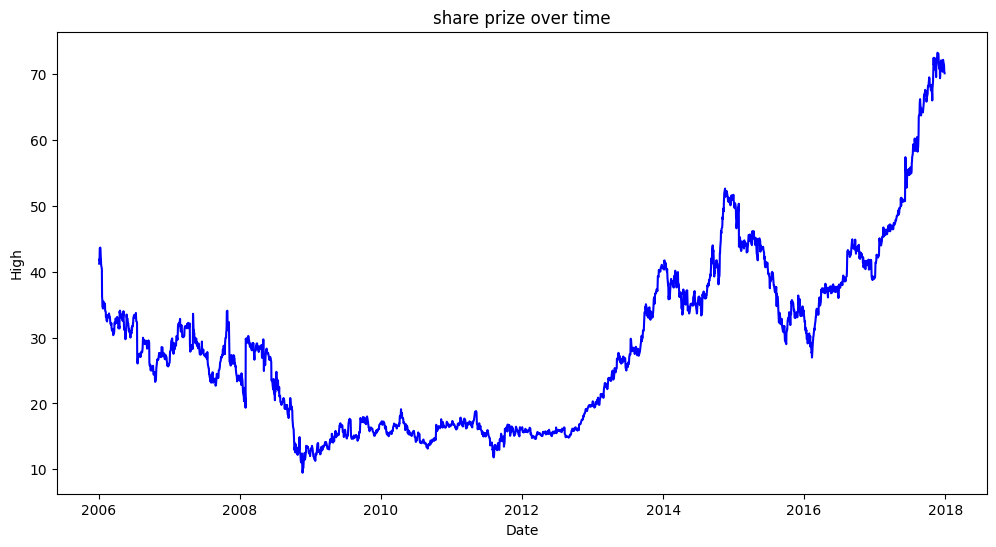

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='High', color='b')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('share prize over time')
plt.show()

In [16]:
df_resampled = df.resample('MS').mean(numeric_only=True)
df_resampled.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-01,38.245500,38.694000,37.641500,38.113000,3.400594e+07
2006-02-01,33.141579,33.436842,32.627368,32.975789,2.329848e+07
2006-03-01,31.333478,31.696957,30.929130,31.218696,2.095522e+07
2006-04-01,32.383684,32.790000,31.914737,32.283158,2.200768e+07
2006-05-01,31.744545,32.175455,31.171364,31.517273,2.218047e+07


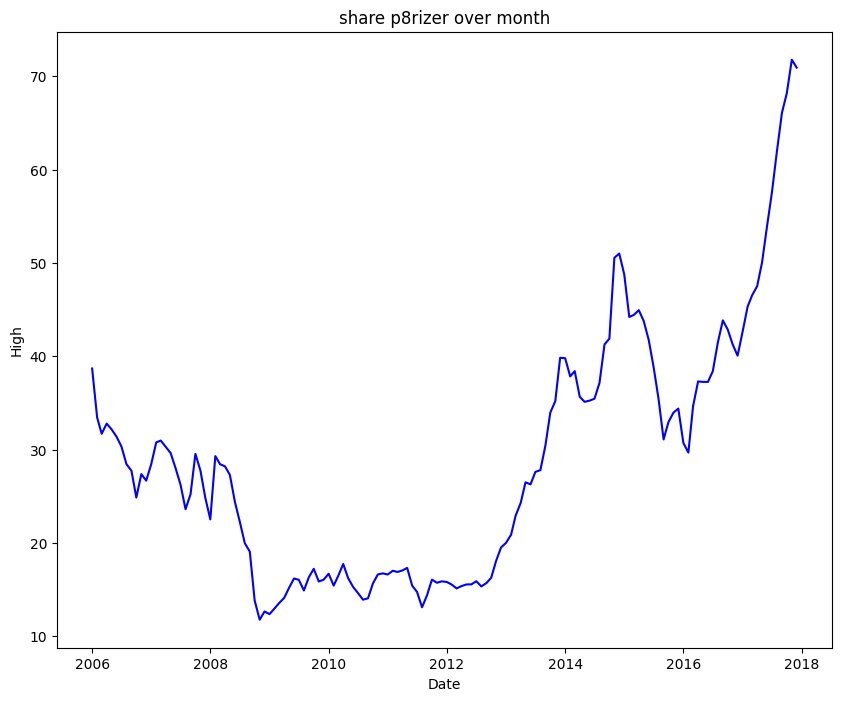

In [18]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=df_resampled, x='Date', y='High', color='b')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('share p8rizer over month')
plt.show()

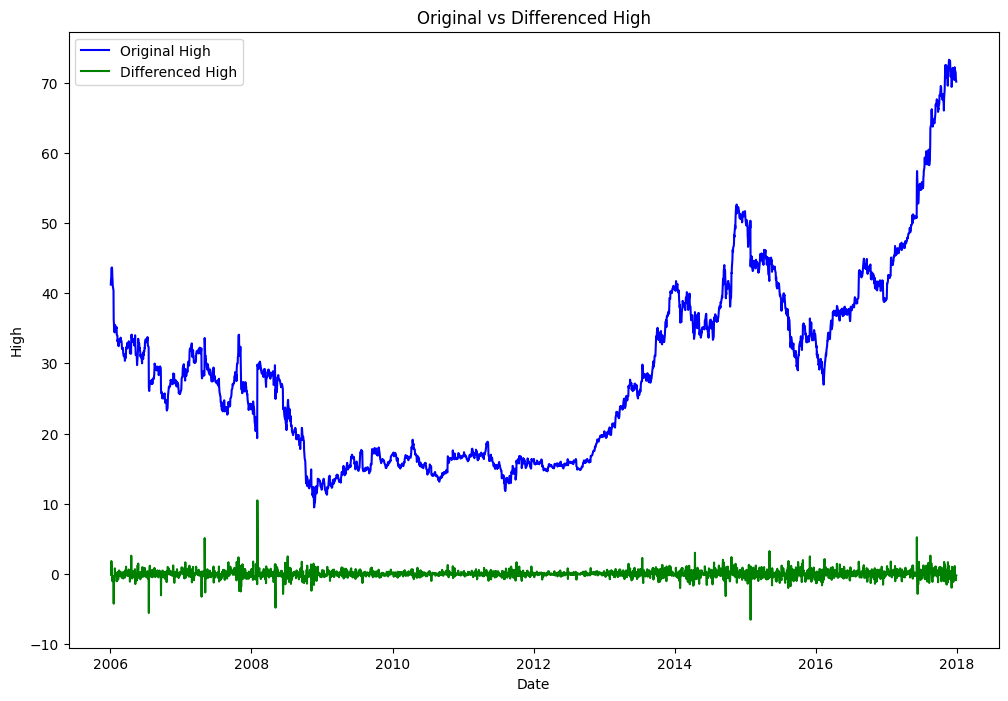

In [31]:
# differencing : Differencing involves subtracting the previous observation from the current observation to remove trends or seasonality.
df['High_diff'] = df['High'].diff()
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Date', y='High', color='b', label='Original High')
sns.lineplot(data=df, x='Date', y='High_diff', color='g', label='Differenced High')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

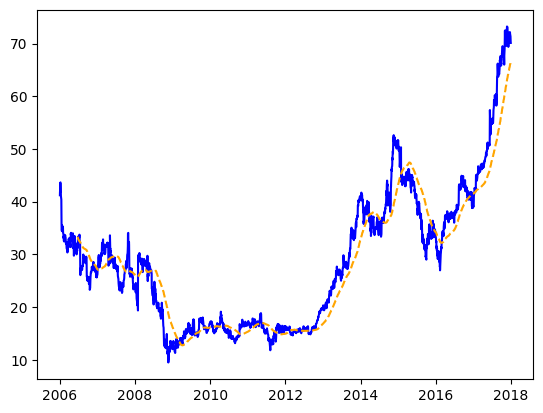

In [30]:
# smoothing data with moving average
window_size=120
df['moving_avg_high'] = df['High'].rolling(window=window_size).mean()

plt.plot(df['High'], color='b')
plt.plot(df['moving_avg_high'], color='orange', linestyle='--')
plt.show()